In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from pytimeparse.timeparse import timeparse

hk = ['1s', '10s', '1m']
si = ['1s', '10s', '1m']
replicas = [1,10,100]

dfs= []
for h in hk:
    for s in si:
        for r in replicas:
            try:
                df = pd.read_csv(f'./data/housekeeping{h}_scraping{s}_replicas{r}.csv')
                df['housekeeping'] = h
                df['scraping'] = s
                df['replicas'] = r
            except:
                continue
            dfs.append(df)

df = pd.concat(dfs)

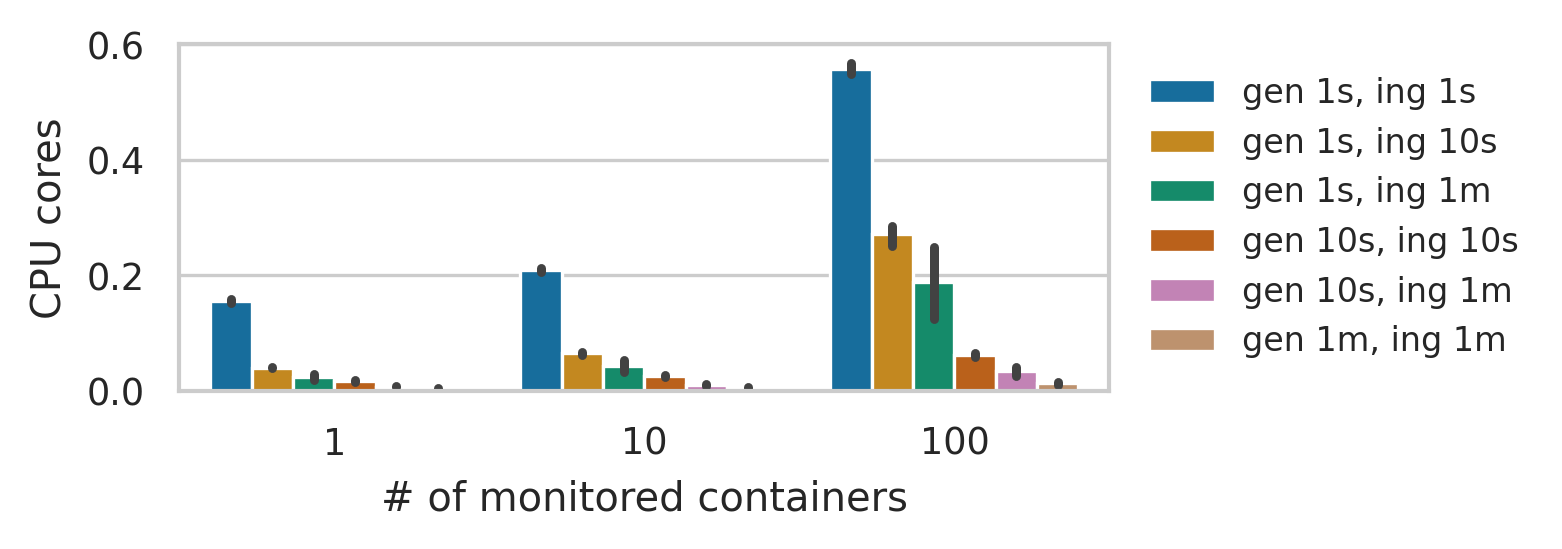

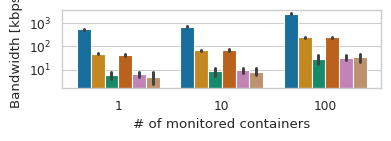

In [14]:
# TODO: best wauy of representing this would be probably to stack the bars, else plot legend apart

sns.set_style('whitegrid')
sns.set_context('paper')
sns.set_palette('colorblind')

title = False
size = (4,1.5)


if title:
    postfix = '_title'
else:
    postfix = ''


df['scraping_sec'] = df['scraping'].apply(timeparse)
df['housekeeping_sec'] = df['housekeeping'].apply(timeparse)
df['cpu_cores'] = df['cpu']
df['net_'] = df['net'] * 8 / 10**3

df['experiment'] = 'gen ' + df['housekeeping'] + ', ing ' + df['scraping']

plt.figure(figsize=size, dpi=300)
ax = sns.barplot(data=df, x='replicas', y='cpu_cores', hue='experiment')
plt.ylim(0, 0.6)
plt.ylabel('CPU cores')
plt.xlabel('# of monitored containers')
if title:
    plt.title('cAdvisor CPU usage vs generation & collection intervals')
ax.get_legend().remove()  
ax.legend(loc='center left', bbox_to_anchor=(1.01, 0.5), frameon=False, fontsize=8)
plt.savefig(f'cpu{postfix}.png')
plt.savefig(f'cpu{postfix}.pdf', bbox_inches='tight', pad_inches=0,)
plt.show()


plt.figure(figsize=size)
ax = sns.barplot(data=df, x='replicas', y='net_', hue='experiment')
plt.semilogy()
plt.ylabel('Bandwidth [kbps]')
plt.xlabel('# of monitored containers')
if title:
    plt.title('cAdvisor bandwidth usage')
plt.tight_layout()
# no legend
ax.get_legend().remove()
plt.savefig(f'net{postfix}.png')
plt.savefig(f'net{postfix}.pdf',bbox_inches='tight', pad_inches=0,)
plt.show()





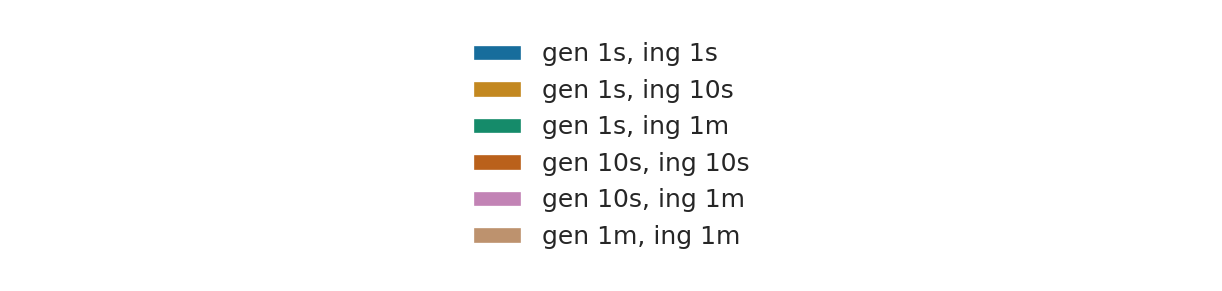

In [7]:
# then create a new image
# adjust the figure size as necessary
figsize = (5, 1)
fig_leg = plt.figure(figsize=figsize, dpi=300)
ax_leg = fig_leg.add_subplot(111)
# add the legend from the previous axes
ax_leg.legend(*ax.get_legend_handles_labels(), loc='center', ncol=1, frameon=False, fontsize=6)
# hide the axes frame and the x/y labels
ax_leg.axis('off')
fig_leg.savefig('legend.pdf', bbox_inches='tight', pad_inches=0, transparent=True)



In [11]:
df.groupby(['housekeeping', 'scraping', 'replicas'])[['cpu_cores']].mean()

cpu_cores
housekeeping scraping replicas           
10s          10s      1          0.210840
                      10         0.313455
                      100        0.781013
             1m       1          0.086399
                      10         0.124769
                      100        0.418757
1m           1m       1          0.051635
                      10         0.064226
                      100        0.163057
1s           10s      1          0.501300
                      10         0.806892
                      100        3.389014
             1m       1          0.305466
                      10         0.539810
                      100        2.354659
             1s       1          1.944646
                      10         2.614076
                      100        6.973033